# Forecasting analysis

In [11]:
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mticker
import util
from PIL import Image
from sirds_model_visualization import get_sirds, get_sirds_extras, show_performance, plot_result, plot_parameters, \
    plot_fuzzy_variables, calculate_performance, plot_outbreak_result

## Reading data

In [12]:
df = pd.read_csv("data/output/df_forecastings_confidence_interval.csv")
df.date = pd.to_datetime(df.date, infer_datetime_format=True)

In [13]:
df_covid_brazil = pd.read_csv('data/output/df_ts_epidemic_episodes.csv')
df_covid_brazil.DATA = pd.to_datetime(df_covid_brazil.DATA)
df_covid_brazil['TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL'] = df_covid_brazil.CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL / df_covid_brazil.POPULACAO_2022 * 100000

In [14]:
df_forecastings = pd.read_csv('data/output/df_sirds.csv')
df_forecastings.date = pd.to_datetime(df_forecastings.date)

In [15]:
df_forecastings = df_forecastings[df_forecastings.alpha == 0]

In [16]:
df_measures = pd.read_csv('data/output/df_sirds_measures.csv')

## Show results

In [17]:
df_measures.columns

Index(['outbreak', 'alpha', 'estimation', 'mae_fit', 'sse_D_fit', 'r2_D_fit',
       'sse_Rt_fit', 'r2_Rt_fit', 'mae_predicton', 'sse_D_predicton',
       'r2_D_predicton', 'sse_Rt_predicton', 'r2_Rt_predicton',
       'mae_predicton_month_1', 'sse_D_predicton_month_1',
       'r2_D_predicton_month_1', 'sse_Rt_predicton_month_1',
       'r2_Rt_predicton_month_1', 'mae_predicton_month_2',
       'sse_D_predicton_month_2', 'r2_D_predicton_month_2',
       'sse_Rt_predicton_month_2', 'r2_Rt_predicton_month_2',
       'mae_predicton_month_3', 'sse_D_predicton_month_3',
       'r2_D_predicton_month_3', 'sse_Rt_predicton_month_3',
       'r2_Rt_predicton_month_3'],
      dtype='object')

In [18]:
df_measures[df_measures.alpha == 0][['outbreak','mae_fit', 'mae_predicton', 'sse_D_fit', 'sse_D_predicton', 'r2_D_fit', 'r2_D_predicton','sse_Rt_fit', 'sse_Rt_predicton', 'r2_Rt_fit', 'r2_Rt_predicton']].groupby('outbreak').mean().round(4)

,mae_fit,mae_predicton,sse_D_fit,sse_D_predicton,r2_D_fit,r2_D_predicton,sse_Rt_fit,sse_Rt_predicton,r2_Rt_fit,r2_Rt_predicton
outbreak,,,,,,,,,,
0.0,0.4006,9.8790,0.0000,32.9624,0.9060,-0.5809,0.1522,0.5560,-0.7079,-18.8173
1.0,0.0592,0.1205,0.0001,0.0020,0.9987,-1.3021,0.0052,0.0013,0.9765,-0.6665
2.0,0.0593,1.2434,0.0001,0.9449,0.9962,-0.2085,0.0029,0.0243,0.9782,-4.9732
3.0,0.0707,0.6970,0.0002,0.6110,0.9932,-142.8966,0.0035,0.0257,0.9686,-0.9563
4.0,0.0765,0.5945,0.0003,0.5082,0.9926,-143.4052,0.0047,0.0130,0.9531,-0.2814
5.0,0.0992,0.4457,0.0009,0.0789,0.9940,-2.6907,0.0097,0.0085,0.8849,-3.9507
6.0,0.1181,2.8789,0.0043,3.1665,0.9673,-33.5348,0.0063,0.0660,0.9101,0.3280
7.0,0.1460,0.6678,0.0050,0.0021,0.9603,-0.2552,0.0055,0.0333,0.9252,0.2224
8.0,0.1609,1.0136,0.0043,0.0036,0.9648,-2138.2477,0.0081,0.1240,0.8815,-0.5460


In [19]:
df_measures[df_measures.alpha == 0][['outbreak', 'r2_D_fit', 'r2_D_predicton', 'r2_D_predicton_month_1', 'r2_D_predicton_month_2', 'r2_D_predicton_month_3']].groupby('outbreak').median().round(4)

,r2_D_fit,r2_D_predicton,r2_D_predicton_month_1,r2_D_predicton_month_2,r2_D_predicton_month_3
outbreak,,,,,
0.0,0.9053,-0.7490,0.0122,-0.1505,-0.1505
1.0,0.9989,-0.8837,-9.0167,-0.2759,-0.2759
2.0,0.9961,0.0531,0.3942,-3.4565,-3.4565
3.0,0.9931,-106.4657,-27.7291,-438.9612,-438.9612
4.0,0.9926,-112.9315,-398.5608,-1548.8099,-1548.8099
5.0,0.9954,-2.7975,-7.8878,-0.9702,-0.9702
6.0,0.9903,-27.0725,-188.4548,-292.8587,-292.8587
7.0,0.9612,0.2497,-8.6447,-18.6593,-18.6593
8.0,0.9659,-742.2135,-522.6886,-8620.6612,-8620.6612


Outbreak:  0.0
Outbreak:  1.0
Outbreak:  2.0
Outbreak:  3.0
Outbreak:  4.0
Outbreak:  5.0
Outbreak:  6.0
Outbreak:  7.0
Outbreak:  8.0


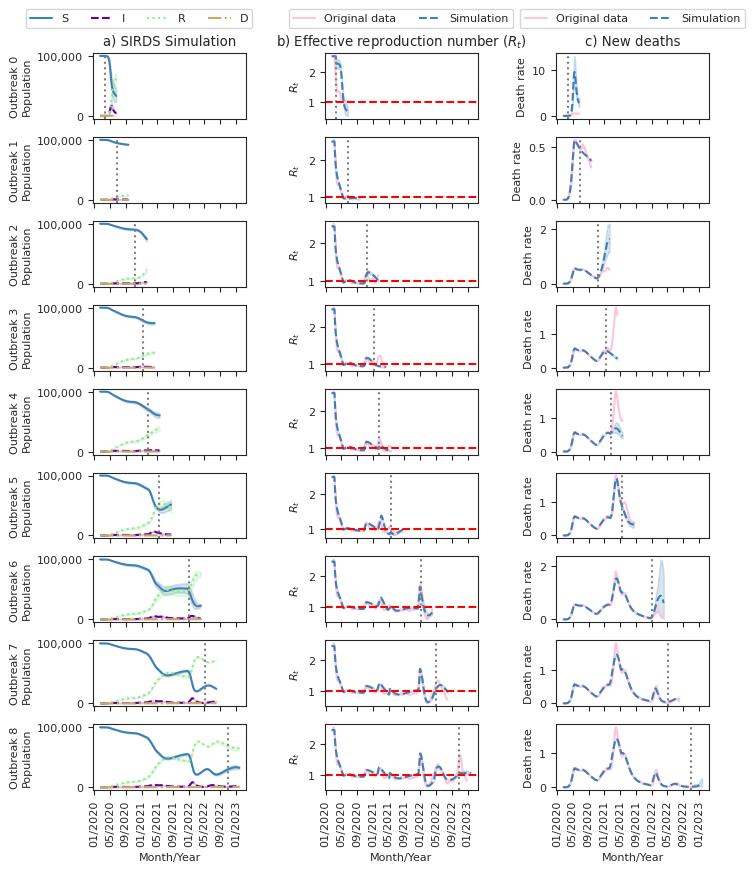

In [20]:
dict_outbreak_S = {}
dict_outbreak_I = {}
dict_outbreak_R = {}
dict_outbreak_D = {}
dict_outbreak_new_deaths = {}
dict_outbreak_rt = {}
dict_max_date_to_fit = {}

date_first_case = df_forecastings.date.min()

for outbreak in df_forecastings.outbreak.unique():
    print('Outbreak: ', outbreak)
    df_forecastings_outbreak = df_forecastings[df_forecastings.outbreak == outbreak]    
    date_max = df_forecastings_outbreak.date.max()
    df_covid_brazil_outbreak = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case) & (df_covid_brazil.DATA <= date_max)]
    
    real_reproduction_number = df_covid_brazil_outbreak.NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA.values
    real_new_deaths = df_covid_brazil_outbreak.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values
    real_total_deaths = df_covid_brazil_outbreak.TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.cumsum().values
    real_new_cases = df_covid_brazil_outbreak.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL.values
    real_total_cases = df_covid_brazil_outbreak.TAXA_CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL.cumsum().values
    
    df_S = df_forecastings_outbreak[['date', 'S']]
    df_I = df_forecastings_outbreak[['date', 'I']]
    df_R = df_forecastings_outbreak[['date', 'R']]
    df_D = df_forecastings_outbreak[['date', 'D']]
    df_I_accumulated = df_forecastings_outbreak[['date', 'I_accumulated']]
    df_new_deaths = df_forecastings_outbreak[['date', 'D_new_deaths']].rename(columns={'D_new_deaths': 'deaths'})
    df_rt = df_forecastings_outbreak[['date', 'reproduction_number_sird']].rename(columns={'reproduction_number_sird': 'rt'})
    df_new_cases = df_forecastings_outbreak[['date', 'I_new_cases']].rename(columns={'I_new_cases': 'cases'})
                
    max_date_to_fit = df_forecastings_outbreak[df_forecastings_outbreak.train_period == True].date.max()
                
    # plot_result(df_S, df_I, df_R, df_D, df_new_deaths, df_I_accumulated, real_new_deaths, real_total_deaths, real_reproduction_number, df_rt, real_total_cases, real_new_cases, df_new_cases, df_covid_brazil_outbreak.DATA.values, id_in_file='_forecasting_outbreak_'+str(outbreak), max_date_to_fit=max_date_to_fit)
    
    dict_outbreak_S[outbreak] = df_S
    dict_outbreak_I[outbreak] = df_I
    dict_outbreak_R[outbreak] = df_R
    dict_outbreak_D[outbreak] = df_D
    dict_outbreak_rt[outbreak] = df_rt
    dict_outbreak_new_deaths[outbreak] = df_new_deaths
    dict_max_date_to_fit[outbreak] = max_date_to_fit

real_reproduction_number = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case)].NUMERO_REPRODUCAO_EFETIVO_SRAG_MEDIA.values
real_new_deaths = df_covid_brazil[(df_covid_brazil.DATA >= date_first_case)].TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM.values
plot_outbreak_result(dict_outbreak_S, dict_outbreak_I, dict_outbreak_R, dict_outbreak_D, dict_outbreak_rt, dict_outbreak_new_deaths, dict_max_date_to_fit, real_reproduction_number, real_new_deaths)

In [21]:
df.dropna().groupby(['outbreak', 'train_period', 'actual_inside_confidence_interval']).count()[['date']]

date
outbreak train_period actual_inside_confidence_interval      
0.0      False        False                                86
                      True                                  4
         True         False                                32
                      True                                  3
1.0      False        False                                86
                      True                                  4
         True         False                               108
                      True                                 20
2.0      False        False                                90
         True         False                               246
                      True                                 24
3.0      False        False                                90
         True         False                               310
                      True                                 20
4.0      False        False                                86
                      True                                  4
         True         False                               341
                      True                                 28
5.0      False        False                                63
                      True                                 27
         True         False                               385
                      True                                 73
6.0      False        False                                47
                      True                                 43
         True         False                               550
                      True                                137
7.0      False        False                                85
                      True                                  5
         True         False                               733
                      True                                 74
8.0      False        False                                53
                      True                                 12
         True         False                               886
                      True                                 98

### Other countries

United States
mae_fit :  0.15918120999145455 ( 0.15687140930870663 , 0.16123603863822866 )
sse_D_fit :  0.0014502971195398434 ( 0.001384478864937383 , 0.0015235187814511492 )
r2_D_fit :  0.9730893286709735 ( 0.9717557832141654 , 0.9744469050257156 )
sse_Rt_fit :  0.010090557890548416 ( 0.009631520138055419 , 0.010634973903250956 )
r2_Rt_fit :  0.8410925356535175 ( 0.8330720322237525 , 0.8485129198293608 )


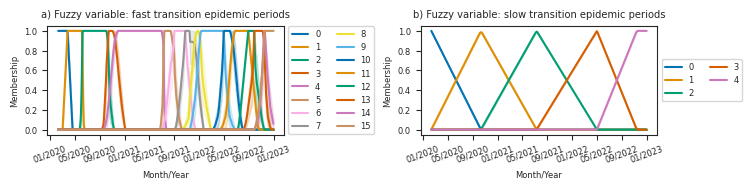

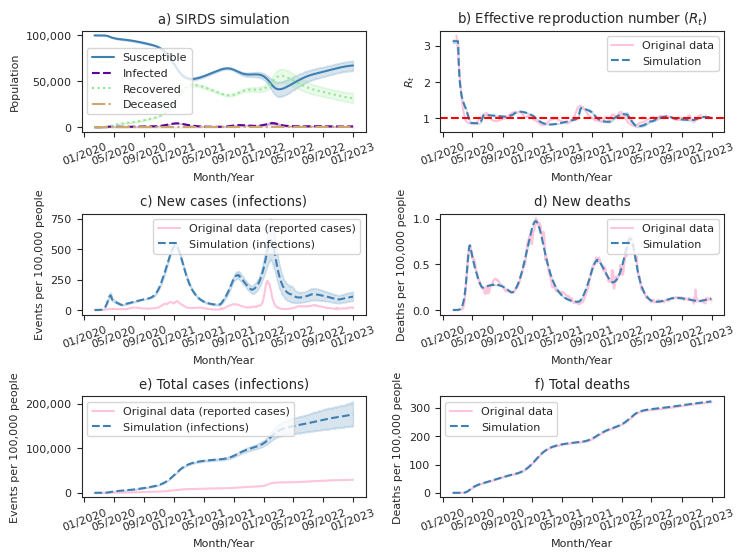

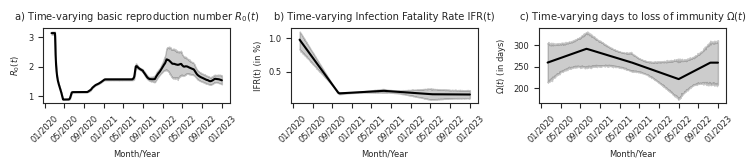

Spain
mae_fit :  0.3231951850662879 ( 0.31671592166280144 , 0.3296089013851628 )
sse_D_fit :  0.006121084473227047 ( 0.005776772334244463 , 0.006485987433748779 )
r2_D_fit :  0.9184888934723465 ( 0.9131566648192034 , 0.9232694296139192 )
sse_Rt_fit :  0.039025556753658645 ( 0.03741195740136606 , 0.04051823266798077 )
r2_Rt_fit :  0.7509086292835774 ( 0.7408055421073269 , 0.7598987416849534 )


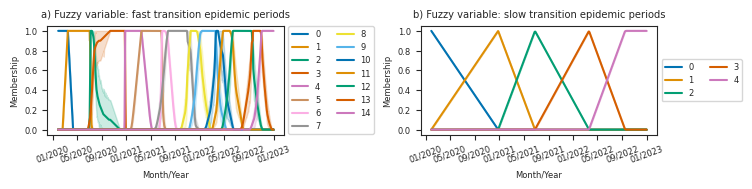

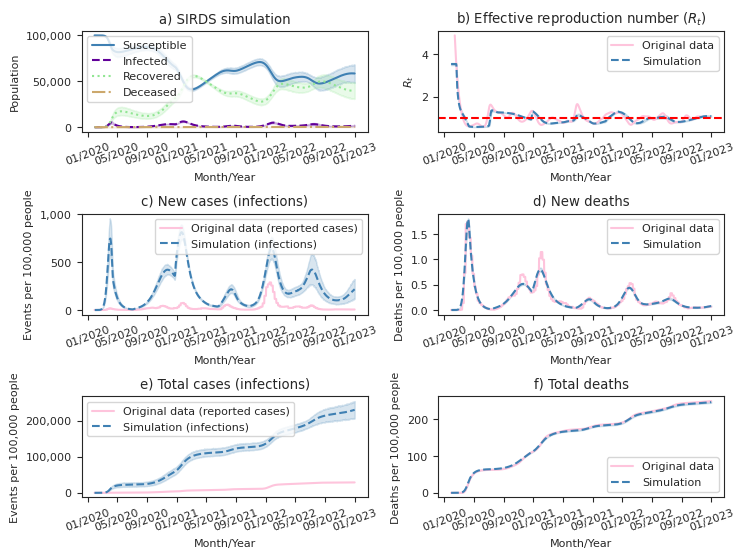

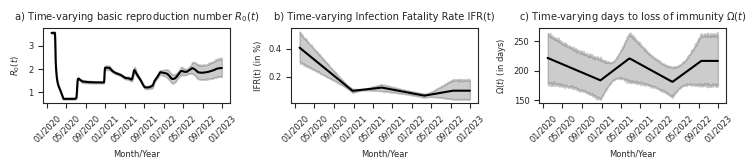

United Kingdom
mae_fit :  0.2236684923243694 ( 0.21993244790785532 , 0.2270801984524811 )
sse_D_fit :  0.002807666817015524 ( 0.002673266677965051 , 0.0029268842989130907 )
r2_D_fit :  0.9839642370368964 ( 0.9833000051158312 , 0.9847247363367477 )
sse_Rt_fit :  0.02329415836352685 ( 0.022087542539285993 , 0.024492399179318086 )
r2_Rt_fit :  0.8860211920932513 ( 0.8798749672158255 , 0.8921079055513339 )


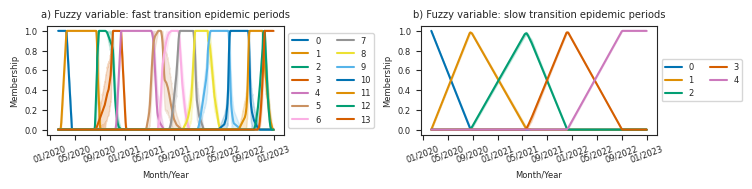

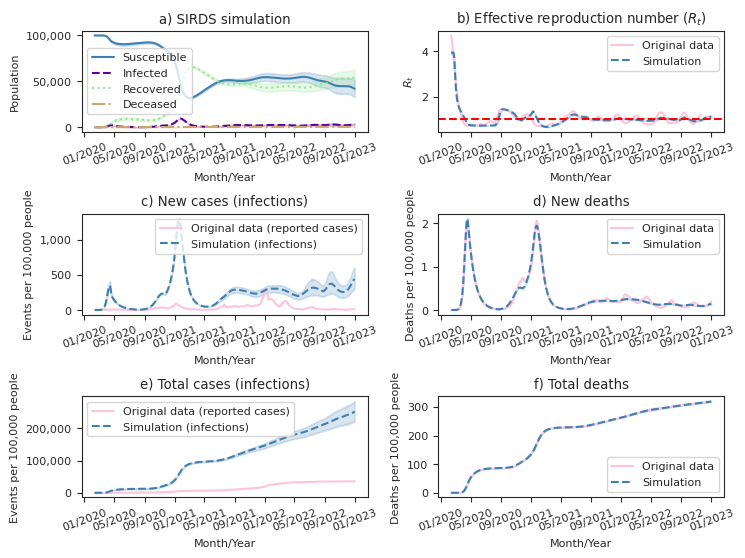

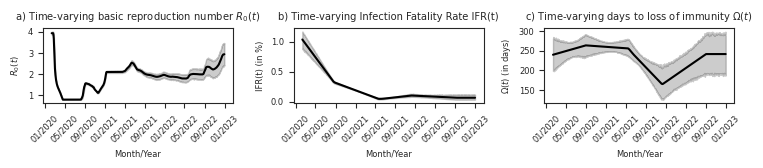

In [56]:
dict_last_prevalence_study = {'Spain': pd.to_datetime('2020-06-22'), 'United Kingdom': pd.to_datetime('2020-09-18'), 'United States': pd.to_datetime('2020-07-31')}

for country in df_fitting_other_countries.location.unique():
    print(country)
    df_results = df_fitting_other_countries[df_fitting_other_countries.location == country]
    date_first_case = pd.to_datetime(df_results.date_first_case.unique()[0])
    
    df_covid_country = df_covid_other_countries[(df_covid_other_countries.location == country) & (df_covid_other_countries.date >= date_first_case)]
    real_reproduction_number = df_covid_country.NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIA.values
    real_new_deaths = df_covid_country.rate_new_deaths_moving_average.values
    real_total_deaths = df_covid_country.rate_new_deaths_moving_average.cumsum().values
    real_new_cases = df_covid_country.rate_new_cases_moving_average.values
    real_total_cases = df_covid_country.rate_new_cases_moving_average.cumsum().values
        
    df_S = pd.DataFrame()
    df_I = pd.DataFrame()
    df_R = pd.DataFrame()
    df_D = pd.DataFrame()
    df_I_accumulated = pd.DataFrame()
    df_new_deaths = pd.DataFrame()
    df_rt = pd.DataFrame()
    df_new_cases = pd.DataFrame()
    df_r0 = pd.DataFrame()
    df_IFR = pd.DataFrame()
    df_Omega = pd.DataFrame()
    list_fuzzy_fast_transition = []
    list_fuzzy_slow_transition = []
    
    dict_performance = {'mae_fit': [], 'sse_D_fit': [], 'r2_D_fit': [], 'sse_Rt_fit': [], 'r2_Rt_fit': []}
    
    for index, result in df_results.iterrows():
        result = result.dropna()
        
        y = get_sirds(result)
        S, I, R, D, I_accumulated = y
        min_length = min(len(real_new_deaths), len(D))
        S = S[:min_length]
        I = I[:min_length]
        R = R[:min_length]
        D = D[:min_length]
        I_accumulated = I_accumulated[:min_length]
        N = S[0] + I[0] + R[0] + D[0]
        
        dates = df_covid_country[:min_length].date.values
        
        D_new_deaths, reproduction_number_sird, I_new_cases, epidemic_periods_with_fast_transition_fuzzy_variable, epidemic_periods_with_slow_transition_fuzzy_variable, days_between_infections_values, case_fatality_probability_values, loss_immunity_in_days_values, estimated_days_between_infections, estimated_case_fatality_probability, estimated_loss_immunity_in_days = get_sirds_extras(result, S, D, I_accumulated)
        
        df_S_temp = pd.DataFrame({'date': dates, 'S': S})
        df_I_temp = pd.DataFrame({'date': dates, 'I': I})
        df_R_temp = pd.DataFrame({'date': dates, 'R': R})
        df_D_temp = pd.DataFrame({'date': dates, 'D': D})
        df_I_accumulated_temp = pd.DataFrame({'date': dates, 'I_accumulated': I_accumulated})
        df_new_deaths_temp = pd.DataFrame({'date': dates[1:], 'deaths': D_new_deaths})
        df_rt_temp = pd.DataFrame({'date': dates, 'rt': reproduction_number_sird})
        df_new_cases_temp = pd.DataFrame({'date': dates[1:], 'cases': I_new_cases})
        df_r0_temp = pd.DataFrame({'date': dates, 'r0': days_to_recovery/estimated_days_between_infections}) 
        df_IRF_temp = pd.DataFrame({'date': dates, 'ifr': estimated_case_fatality_probability})
        df_Omega_temp = pd.DataFrame({'date': dates, 'Omega': estimated_loss_immunity_in_days})
                   
        df_S = pd.concat([df_S, df_S_temp])
        df_I = pd.concat([df_I, df_I_temp])
        df_R = pd.concat([df_R, df_R_temp])
        df_D = pd.concat([df_D, df_D_temp])
        df_I_accumulated = pd.concat([df_I_accumulated, df_I_accumulated_temp])
        df_new_deaths = pd.concat([df_new_deaths, df_new_deaths_temp])
        df_rt = pd.concat([df_rt, df_rt_temp])
        df_new_cases = pd.concat([df_new_cases, df_new_cases_temp])
        df_r0 = pd.concat([df_r0, df_r0_temp])
        df_IFR = pd.concat([df_IFR, df_IRF_temp])
        df_Omega = pd.concat([df_Omega, df_Omega_temp])
        list_fuzzy_fast_transition.append(epidemic_periods_with_fast_transition_fuzzy_variable)
        list_fuzzy_slow_transition.append(epidemic_periods_with_slow_transition_fuzzy_variable)
        
        mae_fit, sse_D_fit, r2_D_fit, sse_Rt_fit, r2_Rt_fit = calculate_performance(real_new_deaths, D_new_deaths, real_reproduction_number,  reproduction_number_sird)
        dict_performance['mae_fit'].append(mae_fit)
        dict_performance['sse_D_fit'].append(sse_D_fit)
        dict_performance['r2_D_fit'].append(r2_D_fit)
        dict_performance['sse_Rt_fit'].append(sse_Rt_fit)
        dict_performance['r2_Rt_fit'].append(r2_Rt_fit)  
        
    show_performance(dict_performance)
    
    last_prevalence_study_country = dict_last_prevalence_study[country]
    df_prevalence_analysis_simulation_temp = df_I_accumulated[df_I_accumulated.date <= last_prevalence_study_country].copy()
    df_prevalence_analysis_simulation_temp['country'] = country
    df_prevalence_analysis_simulation = pd.concat([df_prevalence_analysis_simulation, df_prevalence_analysis_simulation_temp])
    
    df_prevalence_analysis_real_temp = df_covid_country[df_covid_country.date <= last_prevalence_study_country][['date', 'rate_new_cases_moving_average']].copy()
    df_prevalence_analysis_real_temp['country'] = country
    df_prevalence_analysis_real_temp['rate_new_cases_moving_average'] = df_prevalence_analysis_real_temp['rate_new_cases_moving_average'].cumsum() 
    df_prevalence_analysis_real = pd.concat([df_prevalence_analysis_real, df_prevalence_analysis_real_temp])    
    
    plot_fuzzy_variables(dates, list_fuzzy_fast_transition, list_fuzzy_slow_transition, country)

    plot_result(df_S, df_I, df_R, df_D, df_new_deaths, df_I_accumulated, real_new_deaths[:min_length], real_total_deaths[:min_length], real_reproduction_number[:min_length], df_rt, real_total_cases[:min_length], real_new_cases[:min_length], df_new_cases, df_covid_country[:min_length].date.values, epidemic_periods_with_fast_transition_fuzzy_variable, epidemic_periods_with_slow_transition_fuzzy_variable, id_in_file=country)

    plot_parameters(df_r0, df_IFR, df_Omega, country)

## Assessing the seroprevalence

In [57]:
df_prevalence_studies = pd.DataFrame({'country': ['Brazil', 'Brazil', 'Spain', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United States', 'United States'], 'begin': [pd.to_datetime('2020-05-14'), pd.to_datetime('2020-06-04'), pd.to_datetime('2020-04-27'), pd.to_datetime('2020-05-06'), pd.to_datetime('2020-06-04'), pd.to_datetime('2020-08-05'), pd.to_datetime('2020-08-24'), pd.to_datetime('2020-05-27'), pd.to_datetime('2020-07-01')], 'end': [pd.to_datetime('2020-05-21'), pd.to_datetime('2020-06-07'), pd.to_datetime('2020-06-22'), pd.to_datetime('2020-05-29'), pd.to_datetime('2020-06-29'), pd.to_datetime('2020-08-28'), pd.to_datetime('2020-09-18'), pd.to_datetime('2020-07-01'), pd.to_datetime('2020-07-31')], 'prevalence_per_100k': [1900, 3100, 6000, 8300, 7600, 5700, 6100, 5800, 9300], 'prevalence_per_100k_lower': [1700, 2800, 5700, 7500, 6900, 5000, 5400, 5400, 8800], 'prevalence_per_100k_upper': [2100, 3400, 6400, 9200, 8400, 6300, 6800, 6200, 9900]})

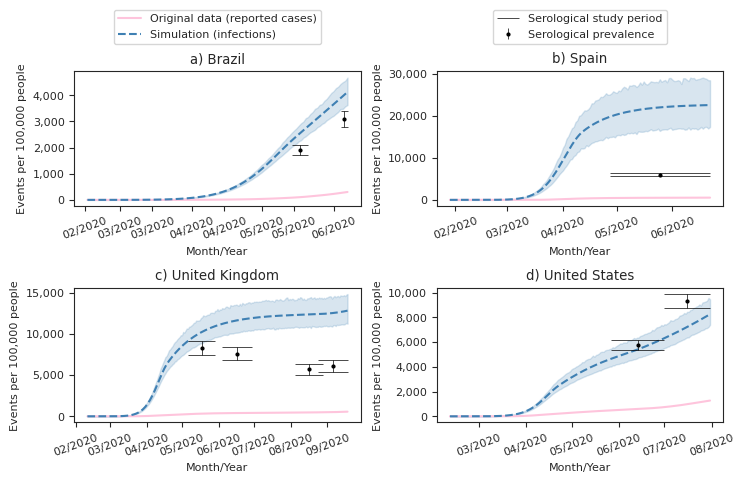

In [58]:
mask_date = mdates.DateFormatter('%m/%Y')
line_styles = ['-', '--', ':', '-.', '-']
plt.rc('font', size=8)
sns.set_style("ticks")
sns.set_palette(util.get_default_colors_categorical_seaborn())

subplots = ['a', 'b', 'c', 'd']

fig, ax = plt.subplots(2, 2, figsize=(util.centimeter_to_inch(19.05), util.centimeter_to_inch(12.93)), sharex=False)

for i, country in enumerate(['Brazil', 'Spain', 'United Kingdom', 'United States']):
    df_prevalence_analysis_real_country = df_prevalence_analysis_real[df_prevalence_analysis_real.country == country]
    df_prevalence_analysis_simulation_country = df_prevalence_analysis_simulation[df_prevalence_analysis_simulation.country == country]

    sns.lineplot(data=df_prevalence_analysis_real_country, x='date', y='rate_new_cases_moving_average', label='Original data (reported cases)', legend=(i==0), linestyle=line_styles[0], ax=ax.flatten()[i])
    sns.lineplot(data=df_prevalence_analysis_simulation_country, x='date', y='I_accumulated', label='Simulation (infections)', legend=(i==0), linestyle=line_styles[1], ax=ax.flatten()[i], errorbar=('ci', 95))
    
    df_prevalence_studies_country = df_prevalence_studies[df_prevalence_studies.country == country].reset_index(drop=True)
    
    for index, prevalence_study in df_prevalence_studies_country.iterrows():
        reference_values = prevalence_study.prevalence_per_100k
        reference_ci_lower = prevalence_study.prevalence_per_100k_lower
        reference_ci_upper = prevalence_study.prevalence_per_100k_upper
        reference_start = prevalence_study.begin
        reference_end = prevalence_study.end
        quantity_days = (reference_end - reference_start).days
        reference_middle = reference_start + pd.DateOffset(days=quantity_days/2)
        if (index == 0) & (i == 1):
            label_prevalence =  'Serological prevalence'
            label_period = 'Serological study period' 
        else:
            label_prevalence = None
            label_period = None
        ax.flatten()[i].errorbar(x=reference_middle, y=reference_values, yerr=[[reference_values - reference_ci_lower], [reference_ci_upper - reference_values]], fmt='o', color='black', markersize=2, label=label_prevalence,  linewidth=0.5)
        ax.flatten()[i].hlines(y=reference_ci_lower, xmin=reference_start, xmax=reference_end, color='black', linestyle='-', label=label_period, linewidth=0.5)
        ax.flatten()[i].hlines(y=reference_ci_upper, xmin=reference_start, xmax=reference_end, color='black', linestyle='-',  linewidth=0.5)
    
    ax.flatten()[i].set_xlabel('Month/Year')
    ax.flatten()[i].xaxis.set_major_formatter(mask_date)
    ax.flatten()[i].tick_params(axis='x', labelrotation=20)
    ax.flatten()[i].set_ylabel('Events per 100,000 people')
    ax.flatten()[i].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.flatten()[i].set_title(subplots[i] + ') ' + country)
    if i == 0:         
        ax.flatten()[i].legend(ncols=1, loc='upper center', bbox_to_anchor=(0.5, 1.5))
    elif i == 1:
        handles, labels = ax.flatten()[i].get_legend_handles_labels()
        ax.flatten()[i].legend(handles[2:], labels[2:], ncols=1, loc='upper center', bbox_to_anchor=(0.5, 1.5))

fig.tight_layout()
filename = 'images/prevalence_analysis'
plt.savefig(filename+'.pdf', bbox_inches="tight")
plt.savefig(filename+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open(filename+".tiff")
img.save(filename+"_compressed.tiff", compression="tiff_lzw")
plt.show()